In [2]:
import pandas as pd #pandas library
import seaborn as sns #seaborn charting built in matplotlib
from matplotlib import pyplot as plt #use matplotlib for tweaks
import numpy as np #for zero conversion
%matplotlib inline 
#keep plots in notebook.

from sklearn import preprocessing

In [24]:
df = pd.read_csv("insurance.csv")
df.shape

(1338, 7)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
le = preprocessing.LabelEncoder()
df1 =df

In [21]:

df1['sex'] = le.fit_transform(df['sex'])
df1['smoker'] = le.fit_transform(df['smoker'])
df1['region'] = le.fit_transform(df['region'])

In [26]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

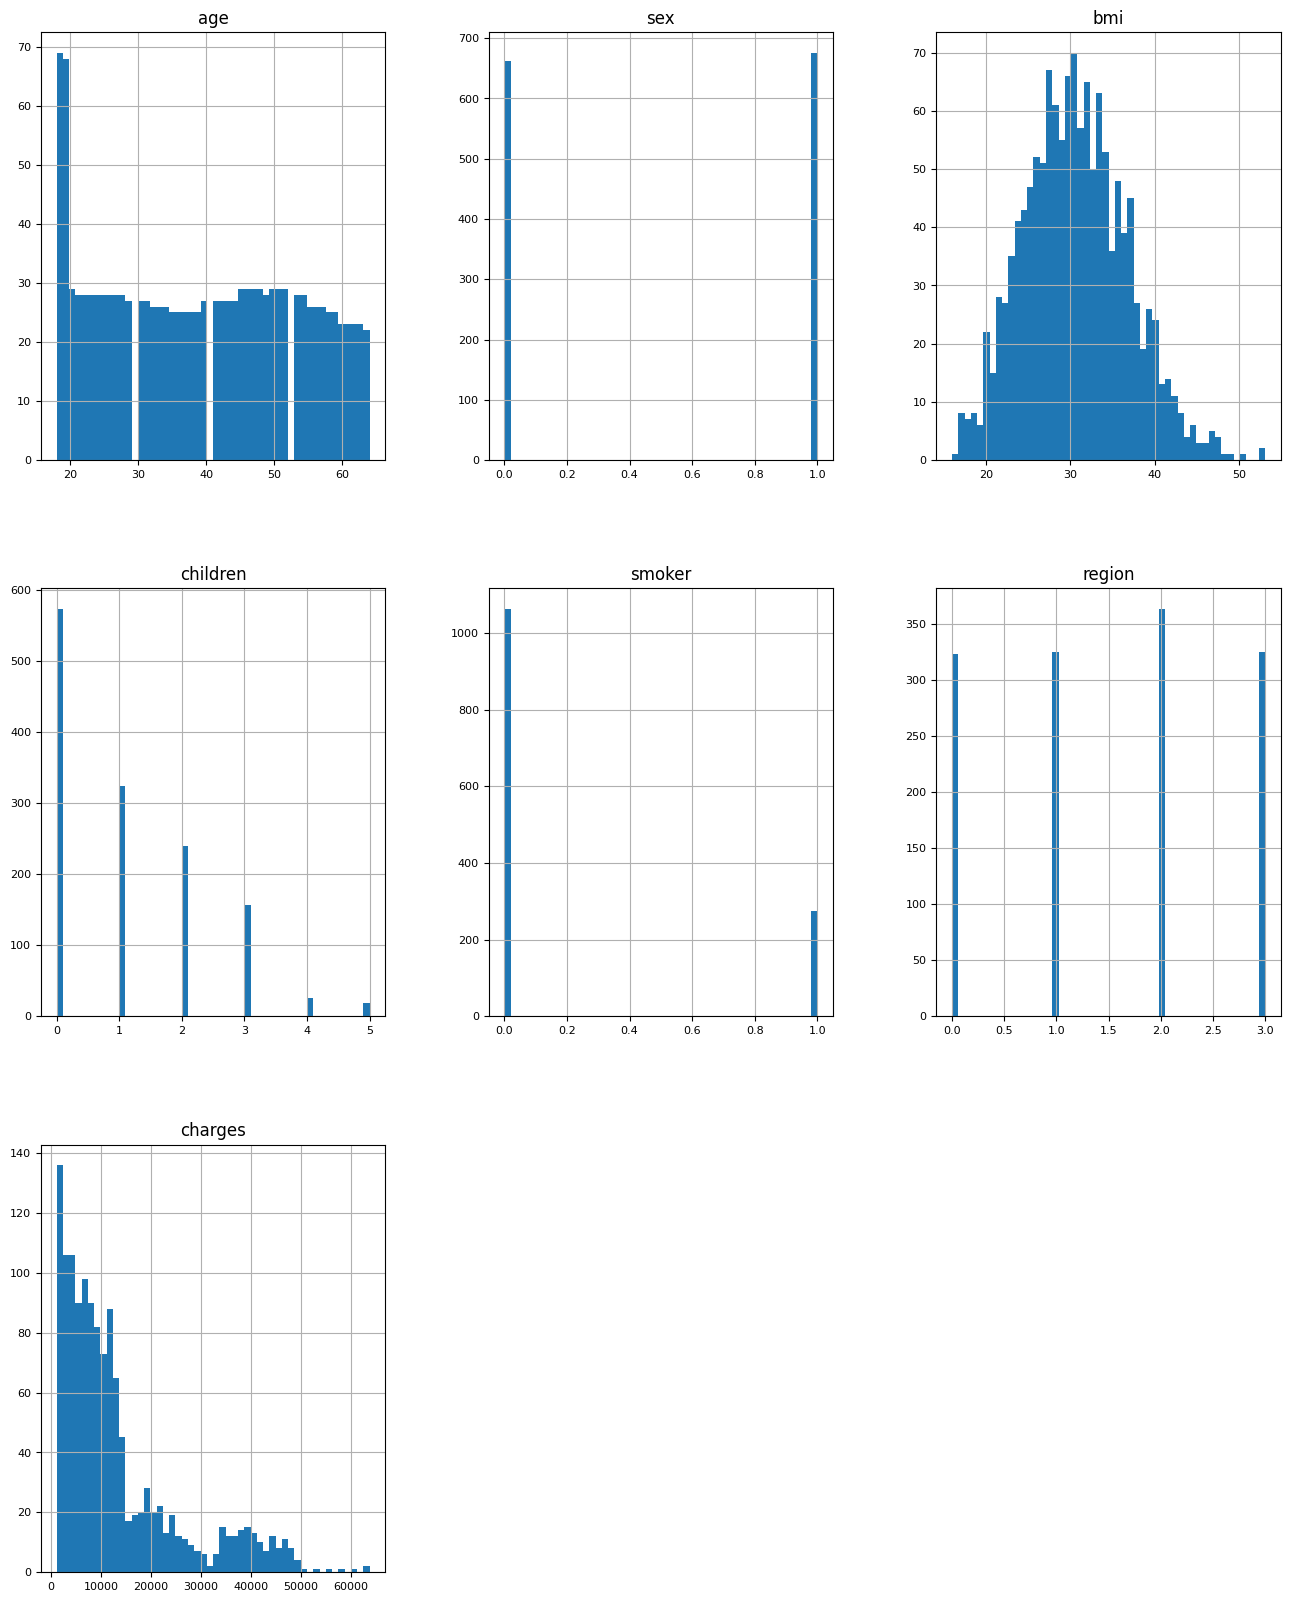

In [22]:
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8) #Plot all variables in a histogram format

Text(0.5, 1.0, 'Correlation Plot')

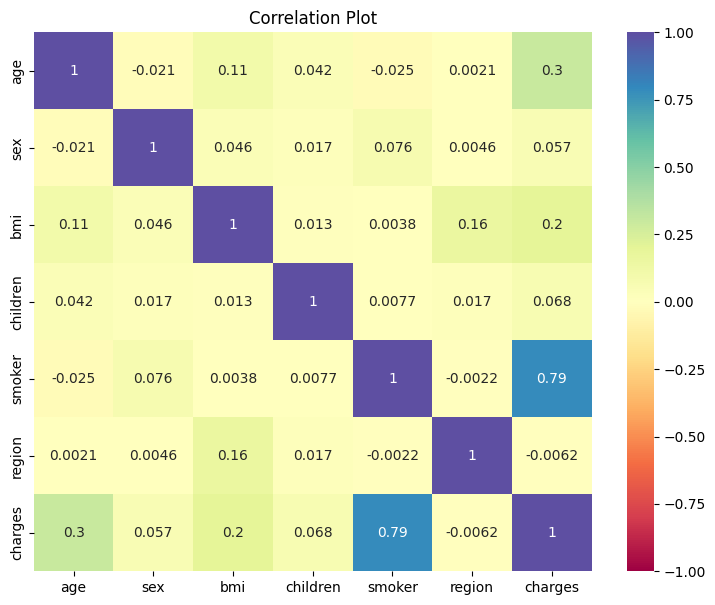

In [23]:
plt.figure(figsize=(9, 7))
sns.heatmap(df1.corr(numeric_only=True),  vmin=-1, vmax=1, cmap='Spectral', annot=True).set_title("Correlation Plot")


C:\Users\dzaus\AppData\Local\Temp\ipykernel_23388\3124409237.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1.smoker == 1]["charges"])
C:\Users\dzaus\AppData\Local\Temp\ipykernel_23388\3124409237.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1.smoker == 0]["charges"]).set(

[Text(0.5, 1.0, 'Charges Density Plot')]

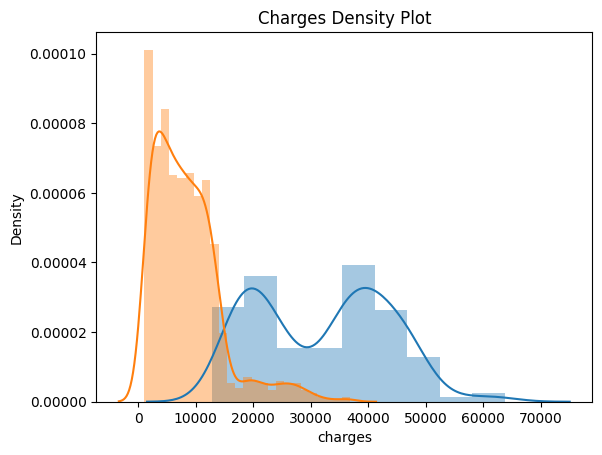

In [52]:
sns.distplot(df1[df1.smoker == 1]["charges"])
sns.distplot(df1[df1.smoker == 0]["charges"]).set(title='Charges Density Plot')

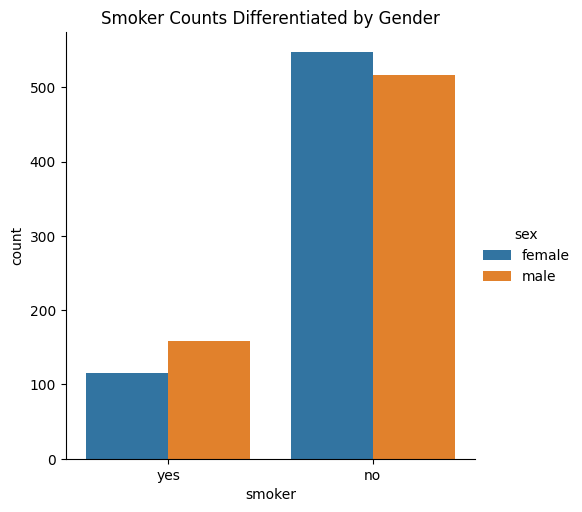

In [50]:
sns.catplot(x="smoker", kind='count', hue='sex', data=df).set(title='Smoker Counts Differentiated by Gender')


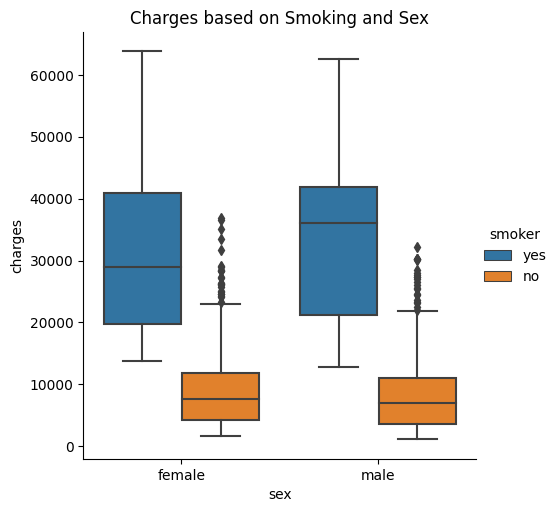

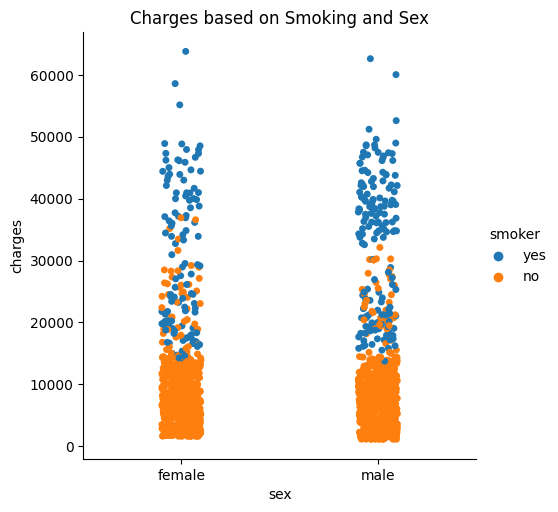

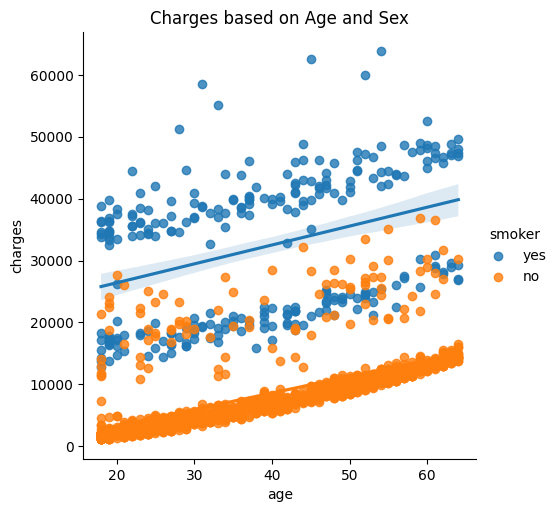

In [51]:
sns.catplot(x='sex', y='charges', hue='smoker', kind='box', data=df).set(title='Charges based on Smoking and Sex')
sns.catplot(x='sex', y='charges', hue='smoker', data=df).set(title='Charges based on Smoking and Sex')
sns.lmplot(x="age", y="charges", hue="smoker", data=df).set(title='Charges based on Age and Sex')

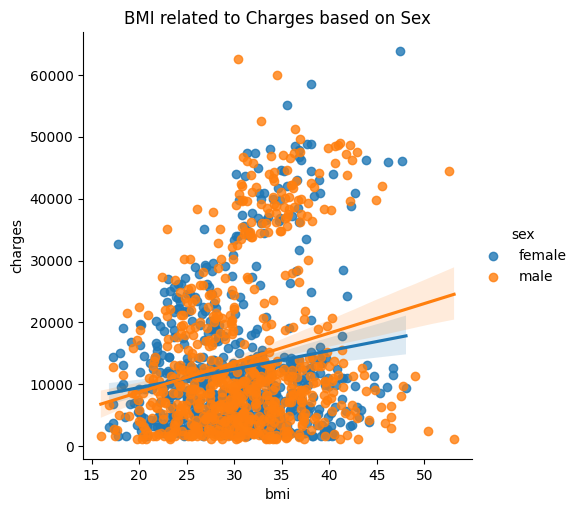

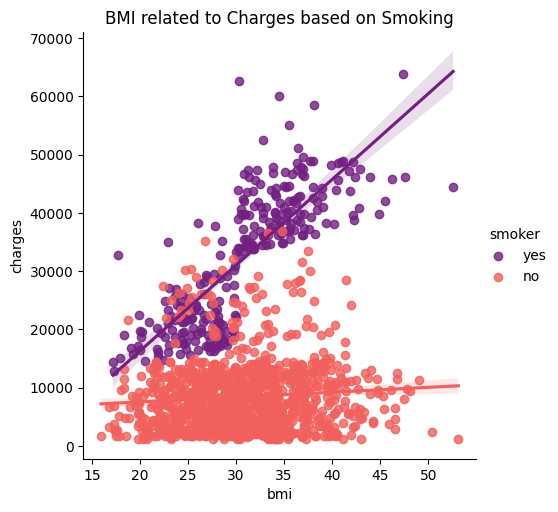

In [48]:
sns.lmplot(x="bmi", y="charges", hue="sex", data=df).set(title='BMI related to Charges based on Sex')
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette='magma').set(title='BMI related to Charges based on Smoking')


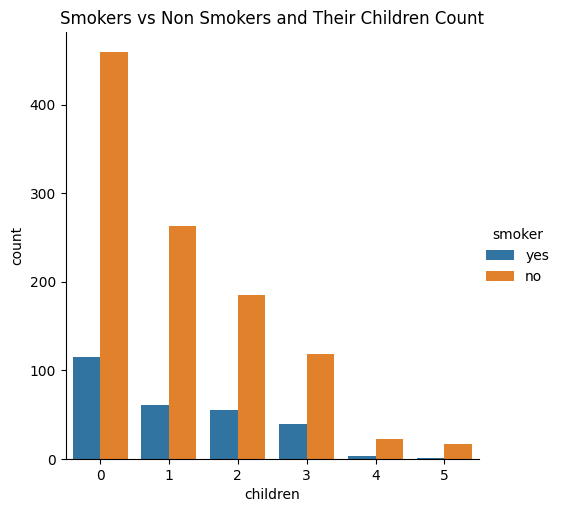

In [49]:
sns.catplot(x="children", kind='count', hue='smoker', data=df).set(title='Smokers vs Non Smokers and Their Children Count')
